In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
url = 'S&S Time Series-February_noheaders.xlsx'
data = pd.read_excel(url, sheet_name= 'Data')

In [ ]:
data.columns = data.columns.str.strip().str.replace(r'\s+', ' ', regex=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22248 entries, 0 to 22247
Data columns (total 64 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Year                                      22248 non-null  int64  
 1   NTD ID                                    22248 non-null  int64  
 2   Agency                                    22248 non-null  object 
 3   Mode                                      22248 non-null  object 
 4   TOS                                       22248 non-null  object 
 5   City                                      22142 non-null  object 
 6   State                                     22248 non-null  object 
 7   UACE CD                                   22236 non-null  float64
 8   UZA Name                                  22236 non-null  object 
 9   Reporter Type                             22248 non-null  object 
 10  UPT                               

In [ ]:
data = data.drop(columns = ['NTD ID', 'UACE CD', 'UZA Name', 'Reporter Type', 'with Motor Vehicle', 'with Person', 'with Fixed Object', 'with Rail Vehicle', 'with Bus Vehicle', 'with Other'])

In [ ]:
data = data.drop(columns = ['Assault Events Involving Transit Workers', 'Other Assault Events', 'Other Security Events', 'NOC Total', 'Other', 'Passenger.1', 'People waiting or leaving.1', 'Operator.1', 'Employee.1', 'Total Employee.1', 'Other Worker.1', 'Bicyclist.1'])

In [ ]:
data = data.drop(columns = ['Ped In Crossing.1', 'Ped Not In Crossing.1', 'Ped Crossing Tracks.1', 'Ped Walking Along Tracks.1', 'Other Vehicle Occupant.1', 'Other.1', 'Trespasser.1', 'Suicide.1', 'Total Other.1'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22248 entries, 0 to 22247
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Year                               22248 non-null  int64 
 1   Agency                             22248 non-null  object
 2   Mode                               22248 non-null  object
 3   TOS                                22248 non-null  object
 4   City                               22142 non-null  object
 5   State                              22248 non-null  object
 6   UPT                                22248 non-null  int64 
 7   Vehicle & Pass. Car Revenue Miles  22248 non-null  int64 
 8   VRH                                22248 non-null  int64 
 9   VOMS                               22248 non-null  int64 
 10  Collision Total                    22248 non-null  int64 
 11  Derailment Total                   22248 non-null  int64 
 12  Fire

In [ ]:
data.head()

,Year,Agency,Mode,TOS,City,State,UPT,Vehicle & Pass. Car Revenue Miles,VRH,VOMS,...,Ped Not In Crossing,Ped Crossing Tracks,Ped Walking Along Tracks,Other Vehicle Occupant,Trespasser,Suicide,Total Other,Total Fatalities,Total Injuries,Serious Injuries
0,2008,King County Department of Metro Transit,DR,PT,SEATTLE,WA,1176076,9173857,656093,355,...,0,0,0,0,0,0,0,0,0,0
1,2009,King County Department of Metro Transit,DR,PT,SEATTLE,WA,1142452,9974975,657222,347,...,0,0,0,0,0,0,0,0,1,0
2,2010,King County Department of Metro Transit,DR,PT,SEATTLE,WA,1177175,9766933,672216,336,...,0,0,0,0,0,0,0,0,15,0
3,2011,King County Department of Metro Transit,DR,PT,SEATTLE,WA,1177101,10035714,686649,336,...,0,0,0,0,0,0,0,0,43,0
4,2012,King County Department of Metro Transit,DR,PT,SEATTLE,WA,1119392,9758968,663829,313,...,0,0,0,0,0,0,0,0,22,0


In [ ]:
data.UPT.mean()

6135003.773462784

In [ ]:
data.groupby(['Year'])[['UPT']].sum()

,UPT
Year,
2008,9779434929
2009,9428675332
2010,9418888576
2011,9611822438
2012,9761032366
2013,9836253529
2014,9931565748
2015,9682605748
2016,9467836640


In [ ]:
data.groupby(['Mode'])[['UPT']].sum()

,UPT
Mode,
AG,48115106
CB,812178933
CC,89911419
DR,1481816130
FB,1036943127
HR,52130762937
IP,18631183
LR,6794590746
MB,70483391664


In [ ]:
data.groupby(['Year', 'Mode'])[['UPT']].sum()

UPT
Year Mode            
2008 AG      14591975
     CC       7540847
     DR      92464567
     FB      60514830
     HR    3494008839
...               ...
2024 SR       6197054
     TB      10141616
     TR        183657
     VP       3699484
     YR        759177

[254 rows x 1 columns]

<Axes: xlabel='Year'>

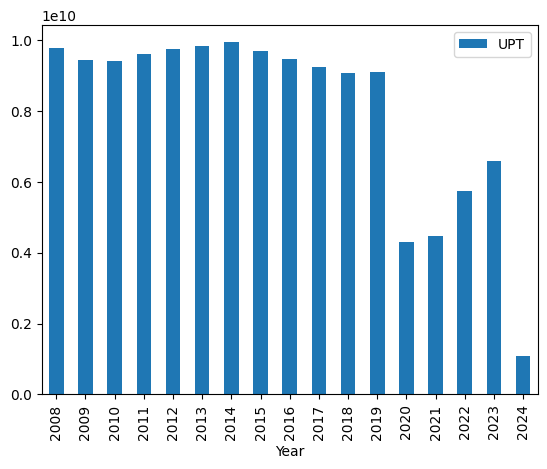

In [ ]:
data.groupby(['Year'])[['UPT']].sum().plot(kind='bar')

<Axes: ylabel='UPT'>

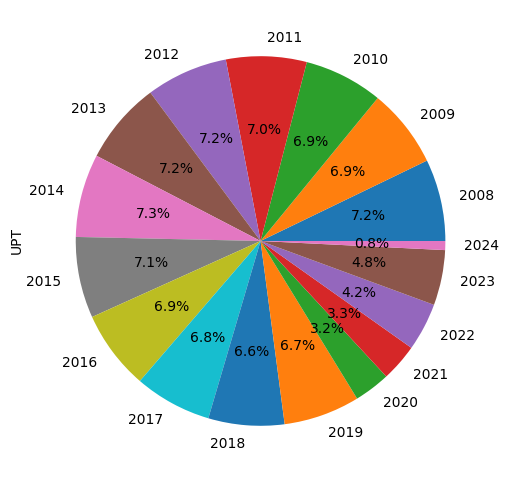

In [ ]:
data.groupby('Year')['UPT'].sum().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 6))

In [ ]:
#data.groupby(['Year', 'Mode'])[['Total Injuries']].sum()

In [ ]:
data.groupby(['Year', 'Mode'])[['Total Injuries']].sum().xs('LR', level='Mode', drop_level=False)

,,Total Injuries
Year,Mode,
2008,LR,1029
2009,LR,1070
2010,LR,1013
2011,LR,999
2012,LR,839
2013,LR,778
2014,LR,994
2015,LR,1002
2016,LR,1020


In [ ]:
data.groupby(['Year', 'Mode'])[['Collision Total']].sum().xs('LR', level='Mode', drop_level=False)

,,Collision Total
Year,Mode,
2008,LR,161
2009,LR,166
2010,LR,207
2011,LR,222
2012,LR,185
2013,LR,146
2014,LR,201
2015,LR,580
2016,LR,571


In [ ]:
data.groupby(['Year', 'Mode'])[['Derailment Total']].sum().xs('LR', level='Mode', drop_level=False)

,,Derailment Total
Year,Mode,
2008,LR,28
2009,LR,17
2010,LR,24
2011,LR,31
2012,LR,14
2013,LR,12
2014,LR,18
2015,LR,56
2016,LR,50


In [ ]:
data.groupby(['Year', 'Mode'])[['Total Fatalities']].sum().xs('LR', level='Mode', drop_level=False)

,,Total Fatalities
Year,Mode,
2008,LR,18
2009,LR,36
2010,LR,22
2011,LR,36
2012,LR,45
2013,LR,35
2014,LR,39
2015,LR,43
2016,LR,39


In [ ]:
data.groupby(['Year', 'Mode'])[['UPT']].sum().xs('LR', level='Mode', drop_level=False)

,,UPT
Year,Mode,
2008.0,LR,468820281
2009.0,LR,463942445
2010.0,LR,462246147
2011.0,LR,494937541
2012.0,LR,454600383
2013.0,LR,459417398
2014.0,LR,484673852
2015.0,LR,480405186
2016.0,LR,496199282


In [ ]:
columns_of_interest = ['Total Injuries', 'Collision Total', 'Derailment Total', 'Total Fatalities']

for col in columns_of_interest:
    result = data.groupby(['Year', 'Mode'])[[col]].sum().xs('LR', level='Mode', drop_level=False)
    print(result)

           Total Injuries
Year Mode                
2008 LR              1029
2009 LR              1070
2010 LR              1013
2011 LR               999
2012 LR               839
2013 LR               778
2014 LR               994
2015 LR              1002
2016 LR              1020
2017 LR              1103
2018 LR               957
2019 LR              1022
2020 LR               779
2021 LR               847
2022 LR               898
2023 LR              1065
2024 LR               172
           Collision Total
Year Mode                 
2008 LR                161
2009 LR                166
2010 LR                207
2011 LR                222
2012 LR                185
2013 LR                146
2014 LR                201
2015 LR                580
2016 LR                571
2017 LR                347
2018 LR                340
2019 LR                318
2020 LR                252
2021 LR                282
2022 LR                357
2023 LR                399
2024 LR             

In [ ]:
result = data.groupby(['Year', 'Mode'])[columns_of_interest].mean().xs('LR', level='Mode', drop_level=False)
print(result)

           Total Injuries  Collision Total  Derailment Total  Total Fatalities
Year Mode                                                                     
2008 LR         34.300000         5.366667          0.933333          0.600000
2009 LR         34.516129         5.354839          0.548387          1.161290
2010 LR         32.677419         6.677419          0.774194          0.709677
2011 LR         31.218750         6.937500          0.968750          1.125000
2012 LR         36.478261         8.043478          0.608696          1.956522
2013 LR         33.826087         6.347826          0.521739          1.521739
2014 LR         43.217391         8.739130          0.782609          1.695652
2015 LR         43.565217        25.217391          2.434783          1.869565
2016 LR         44.347826        24.826087          2.173913          1.695652
2017 LR         47.956522        15.086957          1.521739          2.391304
2018 LR         41.608696        14.782609          

<Axes: xlabel='Year,Mode'>

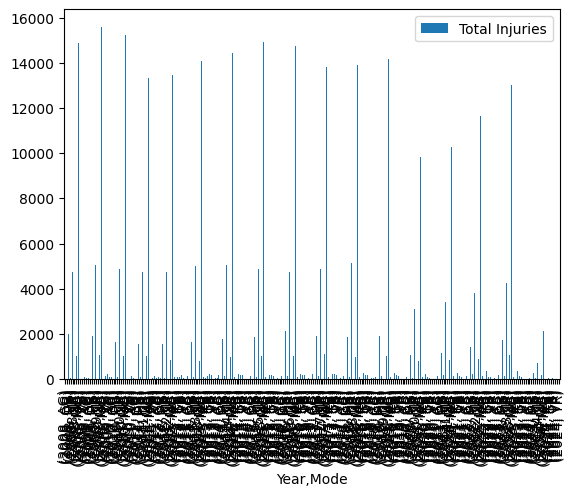

In [ ]:
data.groupby(['Year', 'Mode'])[['Total Injuries']].sum().plot(kind='bar')

In [ ]:
Injury_count = data['Total Injuries'].value_counts()

<Axes: ylabel='Total Injuries'>

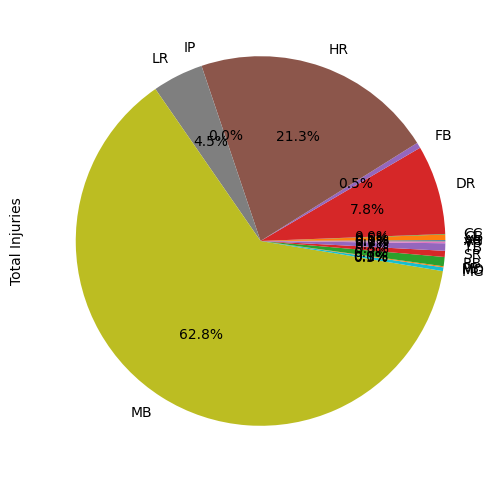

In [ ]:
data.groupby('Mode')['Total Injuries'].sum().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 6))

<Axes: xlabel='Year', ylabel='UPT'>

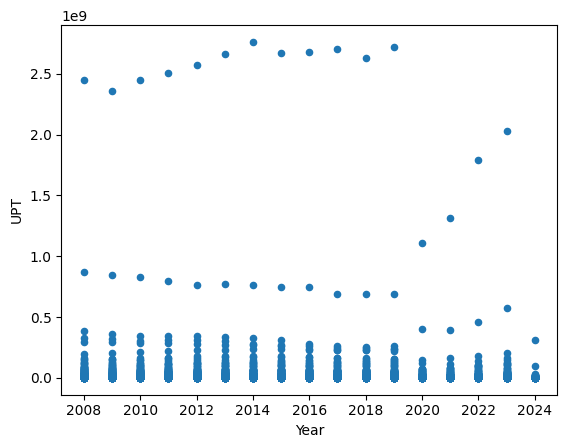

In [ ]:
data.plot.scatter(x='Year', y='UPT')

In [ ]:
columns_of_interest = ['Total Injuries', 'Collision Total', 'Derailment Total', 'Total Fatalities']

for col in columns_of_interest:
    result = data[data['Mode'] == 'LR'].groupby('Mode')[[col]].sum()
    print(result)

      Total Injuries
Mode                
LR           15587.0
      Collision Total
Mode                 
LR               4797
      Derailment Total
Mode                  
LR                 595
      Total Fatalities
Mode                  
LR                 664


In [ ]:
data['Total Injuries'] = data['Total Injuries'].astype(float)

In [ ]:
data['Year'] = data['Year'].astype(float)

In [ ]:
print(data['Year'].tolist())

[2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0, 2023.0, 2024.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0, 2023.0, 2024.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0, 2023.0, 2024.0, 2008.0, 2009.0, 2010.0, 2011.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0, 2023.0, 2024.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0, 2023.0, 2024.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0, 2023.0, 2024.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0, 2023.0, 2024.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0, 2023.0,

In [ ]:
print(data['Agency'].tolist())

['King County Department of Metro Transit', 'King County Department of Metro Transit', 'King County Department of Metro Transit', 'King County Department of Metro Transit', 'King County Department of Metro Transit', 'King County Department of Metro Transit', 'King County Department of Metro Transit', 'King County Department of Metro Transit', 'King County Department of Metro Transit', 'King County Department of Metro Transit', 'King County Department of Metro Transit', 'King County Department of Metro Transit', 'King County Department of Metro Transit', 'King County Department of Metro Transit', 'King County Department of Metro Transit', 'King County Department of Metro Transit', 'King County Department of Metro Transit', 'King County Department of Metro Transit', 'King County Department of Metro Transit', 'King County Department of Metro Transit', 'King County Department of Metro Transit', 'King County Department of Metro Transit', 'King County Department of Metro Transit', 'King Coun

In [ ]:
data['Agency'].replace({'Metro Transit (Minneapolis)': 'Metro Transit',
                            'Denver Regional Transportation District (RTD)': 'Denver Regional Transportation District',
                           'Santa Clara Valley Transportation Authority (VTA)': 'Santa Clara Valley Transportation Authority',
                            'City and County of San Francisco (SFMTA)': 'City and County of San Francisco',
                            'Sacramento Regional Transit District (SACRT)': 'Sacramento Regional Transit District',
                            'San Diego Metropolitan Transit System (MTS)':'San Diego Metropolitan Transit System',
                            'Los Angeles County Metropolitan Transportation Authority (Metro)':'Los Angeles County Metropolitan Transportation Authority',
                            'Valley Metro Rail, Inc. (Valley Metro)':'Valley Metro Rail, Inc.'
                            }, inplace=True)

In [ ]:
data.loc[data['Agency'] == 'New Jersey Transit Corporation', 'Agency'] = 'New Jersey Transit Corporation - Newark'

In [ ]:
data_injuries = data

In [ ]:
data_injuries['Total Injuries'].describe()

count    22248.000000
mean        15.715795
std         93.911088
min          0.000000
25%          0.000000
50%          0.000000
75%          5.000000
max       3144.000000
Name: Total Injuries, dtype: float64

In [ ]:
selected_agencies = [
    "Tri-County Metropolitan Transportation District of Oregon",
    "Central Puget Sound Regional Transit Authority",
    "Massachusetts Bay Transportation Authority",
    "Niagara Frontier Transportation Authority",
    "New Jersey Transit Corporation",
    "Pittsburgh Regional Transit",
    "Maryland Transit Administration",
    "Transportation District Commission of Hampton Roads",
    "City of Charlotte North Carolina",
    "The Greater Cleveland Regional Transit Authority",
    "Metro Transit",
    "Metropolitan Transit Authority of Harris County, Texas",
    "Dallas Area Rapid Transit",
    "Bi-State Development Agency of the Missouri-Illinois Metropolitan District",
    "Utah Transit Authority",
    "Denver Regional Transportation District",
    "Santa Clara Valley Transportation Authority",
    "City and County of San Francisco",
    "Sacramento Regional Transit District",
    "San Diego Metropolitan Transit System",
    "Los Angeles County Metropolitan Transportation Authority",
    "Valley Metro Rail, Inc."
]

filtered_df = data[data['Agency'].isin(selected_agencies)]

In [ ]:
filtered_df

,Year,Agency,Mode,TOS,City,State,UPT,Vehicle & Pass. Car Revenue Miles,VRH,VOMS,...,Ped Not In Crossing,Ped Crossing Tracks,Ped Walking Along Tracks,Other Vehicle Occupant,Trespasser,Suicide,Total Other,Total Fatalities,Total Injuries,Serious Injuries
448,2008.0,Tri-County Metropolitan Transportation Distric...,DR,PT,PORTLAND,OR,1105225,8390203,577039,273,...,0,0,0,0,0,0,0,0,6.0,0
449,2009.0,Tri-County Metropolitan Transportation Distric...,DR,PT,PORTLAND,OR,1080228,8307361,567018,264,...,0,0,0,0,0,0,0,0,1.0,0
450,2010.0,Tri-County Metropolitan Transportation Distric...,DR,PT,PORTLAND,OR,1069704,7563806,516679,264,...,0,0,0,0,0,0,0,0,2.0,0
451,2011.0,Tri-County Metropolitan Transportation Distric...,DR,PT,PORTLAND,OR,948612,6606504,475139,221,...,0,0,0,0,0,0,0,0,12.0,0
452,2012.0,Tri-County Metropolitan Transportation Distric...,DR,PT,PORTLAND,OR,934167,6523111,469529,223,...,0,0,0,0,0,0,0,0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21669,2023.0,"Valley Metro Rail, Inc.",LR,PT,PHOENIX,AZ,10055291,3017451,220876,32,...,0,0,0,0,0,0,0,0,50.0,1
21670,2024.0,"Valley Metro Rail, Inc.",LR,PT,PHOENIX,AZ,1746000,514617,41587,32,...,0,0,0,1,0,0,1,1,8.0,2
21671,2022.0,"Valley Metro Rail, Inc.",SR,PT,PHOENIX,AZ,364150,73584,13938,3,...,0,0,0,0,0,0,0,0,0.0,0
21672,2023.0,"Valley Metro Rail, Inc.",SR,PT,PHOENIX,AZ,796294,121016,26191,3,...,0,0,0,0,0,0,0,0,0.0,0


In [ ]:
filtered_df = filtered_df[filtered_df['Mode'] == 'LR']

In [ ]:
filtered_df

,Year,Agency,Mode,TOS,City,State,UPT,Vehicle & Pass. Car Revenue Miles,VRH,VOMS,...,Ped Not In Crossing,Ped Crossing Tracks,Ped Walking Along Tracks,Other Vehicle Occupant,Trespasser,Suicide,Total Other,Total Fatalities,Total Injuries,Serious Injuries
481,2008.0,Tri-County Metropolitan Transportation Distric...,LR,DO,PORTLAND,OR,35772900,6940264,434554,79,...,0,0,0,0,0,0,0,0,44.0,0
482,2009.0,Tri-County Metropolitan Transportation Distric...,LR,DO,PORTLAND,OR,35966000,7402173,477562,101,...,0,1,0,1,0,1,3,4,54.0,0
483,2010.0,Tri-County Metropolitan Transportation Distric...,LR,DO,PORTLAND,OR,44239796,8229486,579786,110,...,0,1,1,0,0,0,2,2,41.0,0
484,2011.0,Tri-County Metropolitan Transportation Distric...,LR,DO,PORTLAND,OR,45882927,7953829,566716,110,...,0,0,0,0,0,1,1,2,54.0,0
485,2012.0,Tri-County Metropolitan Transportation Distric...,LR,DO,PORTLAND,OR,40874980,7769859,530803,104,...,0,0,0,0,0,1,1,1,76.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21666,2020.0,"Valley Metro Rail, Inc.",LR,PT,PHOENIX,AZ,8557187,3148309,204973,40,...,0,0,0,2,0,0,3,3,24.0,0
21667,2021.0,"Valley Metro Rail, Inc.",LR,PT,PHOENIX,AZ,7250503,2961315,190009,38,...,0,0,0,1,0,0,1,2,24.0,0
21668,2022.0,"Valley Metro Rail, Inc.",LR,PT,PHOENIX,AZ,8786881,2881181,194583,32,...,1,0,0,0,0,0,2,2,50.0,5
21669,2023.0,"Valley Metro Rail, Inc.",LR,PT,PHOENIX,AZ,10055291,3017451,220876,32,...,0,0,0,0,0,0,0,0,50.0,1


In [ ]:
def categorize(row):
    if row['Total Injuries'] <= 0.0:
        return 1
    elif row['Total Injuries'] > 1.0 and row['Total Injuries'] <= 6.0 :
        return 2
    elif row['Total Injuries'] > 6.0 and row['Total Injuries'] <= 12.0:
        return 3
    elif row['Total Injuries'] > 12.0:
        return 4

data_injuries['Tot_Inj_rank'] = data_injuries.apply(categorize, axis=1)

print(data_injuries)

         Year                                   Agency Mode TOS      City  \
0      2008.0  King County Department of Metro Transit   DR  PT   SEATTLE   
1      2009.0  King County Department of Metro Transit   DR  PT   SEATTLE   
2      2010.0  King County Department of Metro Transit   DR  PT   SEATTLE   
3      2011.0  King County Department of Metro Transit   DR  PT   SEATTLE   
4      2012.0  King County Department of Metro Transit   DR  PT   SEATTLE   
...       ...                                      ...  ...  ..       ...   
22243  2020.0   Pomona Valley Transportation Authority   DR  TX  LA VERNE   
22244  2021.0   Pomona Valley Transportation Authority   DR  TX  LA VERNE   
22245  2022.0   Pomona Valley Transportation Authority   DR  TX  LA VERNE   
22246  2023.0   Pomona Valley Transportation Authority   DR  TX  LA VERNE   
22247  2024.0   Pomona Valley Transportation Authority   DR  TX  LA VERNE   

      State      UPT  Vehicle & Pass. Car Revenue Miles     VRH  VOMS  ... 

In [ ]:
selected_agencies = [
    "Tri-County Metropolitan Transportation District of Oregon",
    "Central Puget Sound Regional Transit Authority",
    "Massachusetts Bay Transportation Authority",
    "Niagara Frontier Transportation Authority",
    "New Jersey Transit Corporation",
    "Pittsburgh Regional Transit",
    "Maryland Transit Administration",
    "Transportation District Commission of Hampton Roads",
    "City of Charlotte North Carolina",
    "The Greater Cleveland Regional Transit Authority",
    "Metro Transit",
    "Metropolitan Transit Authority of Harris County, Texas",
    "Dallas Area Rapid Transit",
    "Bi-State Development Agency of the Missouri-Illinois Metropolitan District",
    "Utah Transit Authority",
    "Denver Regional Transportation District",
    "Santa Clara Valley Transportation Authority",
    "City and County of San Francisco",
    "Sacramento Regional Transit District",
    "San Diego Metropolitan Transit System",
    "Los Angeles County Metropolitan Transportation Authority",
    "Valley Metro Rail, Inc."
]

filtered_df = data_injuries[data_injuries['Agency'].isin(selected_agencies)]

In [ ]:
filtered_df = filtered_df[filtered_df['Year'] == 2023]

In [ ]:
filtered_df = filtered_df[filtered_df['Mode'] == 'LR']

In [ ]:
filtered_df

,Year,Agency,Mode,TOS,City,State,UPT,Vehicle & Pass. Car Revenue Miles,VRH,VOMS,...,Ped Crossing Tracks,Ped Walking Along Tracks,Other Vehicle Occupant,Trespasser,Suicide,Total Other,Total Fatalities,Total Injuries,Serious Injuries,Tot_Inj_rank
496,2023.0,Tri-County Metropolitan Transportation Distric...,LR,DO,PORTLAND,OR,23395460,7778988,564988,102,...,0,0,0,0,0,3,4,45.0,4,4.0
1259,2023.0,Central Puget Sound Regional Transit Authority,LR,DO,SEATTLE,WA,26867751,8252514,406385,84,...,0,0,0,0,0,0,0,86.0,11,4.0
1755,2023.0,Massachusetts Bay Transportation Authority,LR,DO,BOSTON,MA,33875783,5412281,589101,128,...,0,0,0,0,0,0,1,94.0,2,4.0
3237,2023.0,Niagara Frontier Transportation Authority,LR,DO,BUFFALO,NY,2433450,716067,70482,21,...,0,0,0,0,0,0,0,10.0,0,3.0
5239,2023.0,Pittsburgh Regional Transit,LR,DO,PITTSBURGH,PA,3471870,1476928,111505,47,...,0,0,0,0,0,0,0,3.0,0,2.0
5668,2023.0,Maryland Transit Administration,LR,DO,BALTIMORE,MD,3546666,2663945,183891,17,...,0,0,0,0,1,2,2,16.0,3,4.0
6467,2023.0,Transportation District Commission of Hampton ...,LR,DO,HAMPTON,VA,782344,341449,28173,5,...,0,0,0,0,0,0,0,4.0,2,2.0
7367,2023.0,City of Charlotte North Carolina,LR,DO,CHARLOTTE,NC,5499194,1600754,106420,20,...,0,0,0,0,0,0,0,9.0,1,3.0
11413,2023.0,The Greater Cleveland Regional Transit Authority,LR,DO,CLEVELAND,OH,662113,476284,32568,8,...,0,0,0,0,0,0,0,3.0,1,2.0
15718,2023.0,Dallas Area Rapid Transit,LR,DO,DALLAS,TX,21380930,10045268,534361,75,...,0,0,0,0,0,3,5,155.0,10,4.0


In [ ]:
def categorize(row):
    if row['Collision Total'] <= 0.0:
        return 1
    elif row['Collision Total'] > 0.0 and row['Collision Total'] <= 4.0 :
        return 2
    elif row['Collision Total'] > 4.0 and row['Collision Total'] <= 9.0:
        return 3
    elif row['Collision Total'] > 9.0:
        return 4

data_injuries['Tot_Col_rank'] = data_injuries.apply(categorize, axis=1)

print(data_injuries)

         Year                                   Agency Mode TOS      City  \
0      2008.0  King County Department of Metro Transit   DR  PT   SEATTLE   
1      2009.0  King County Department of Metro Transit   DR  PT   SEATTLE   
2      2010.0  King County Department of Metro Transit   DR  PT   SEATTLE   
3      2011.0  King County Department of Metro Transit   DR  PT   SEATTLE   
4      2012.0  King County Department of Metro Transit   DR  PT   SEATTLE   
...       ...                                      ...  ...  ..       ...   
22243  2020.0   Pomona Valley Transportation Authority   DR  TX  LA VERNE   
22244  2021.0   Pomona Valley Transportation Authority   DR  TX  LA VERNE   
22245  2022.0   Pomona Valley Transportation Authority   DR  TX  LA VERNE   
22246  2023.0   Pomona Valley Transportation Authority   DR  TX  LA VERNE   
22247  2024.0   Pomona Valley Transportation Authority   DR  TX  LA VERNE   

      State      UPT  Vehicle & Pass. Car Revenue Miles     VRH  VOMS  ... 

In [ ]:
def categorize(row):
    if row['Derailment Total'] == 0.0:
        return 1
    elif row['Derailment Total'] == 1.0:
        return 2
    elif row['Derailment Total'] == 2.0:
        return 3
    elif row['Derailment Total'] >= 3.0:
        return 4

data_injuries['Tot_Der_rank'] = data_injuries.apply(categorize, axis=1)

print(data_injuries)

         Year                                   Agency Mode TOS      City  \
0      2008.0  King County Department of Metro Transit   DR  PT   SEATTLE   
1      2009.0  King County Department of Metro Transit   DR  PT   SEATTLE   
2      2010.0  King County Department of Metro Transit   DR  PT   SEATTLE   
3      2011.0  King County Department of Metro Transit   DR  PT   SEATTLE   
4      2012.0  King County Department of Metro Transit   DR  PT   SEATTLE   
...       ...                                      ...  ...  ..       ...   
22243  2020.0   Pomona Valley Transportation Authority   DR  TX  LA VERNE   
22244  2021.0   Pomona Valley Transportation Authority   DR  TX  LA VERNE   
22245  2022.0   Pomona Valley Transportation Authority   DR  TX  LA VERNE   
22246  2023.0   Pomona Valley Transportation Authority   DR  TX  LA VERNE   
22247  2024.0   Pomona Valley Transportation Authority   DR  TX  LA VERNE   

      State      UPT  Vehicle & Pass. Car Revenue Miles     VRH  VOMS  ... 

In [ ]:
def categorize(row):
    if row['Total Fatalities'] == 0.0:
        return 1
    elif row['Total Fatalities'] == 1.0:
        return 2
    elif row['Total Fatalities'] == 2.0:
        return 3
    elif row['Total Fatalities'] >= 3.0:
        return 4

data_injuries['Tot_Fatal_rank'] = data_injuries.apply(categorize, axis=1)

print(data_injuries)

         Year                                   Agency Mode TOS      City  \
0      2008.0  King County Department of Metro Transit   DR  PT   SEATTLE   
1      2009.0  King County Department of Metro Transit   DR  PT   SEATTLE   
2      2010.0  King County Department of Metro Transit   DR  PT   SEATTLE   
3      2011.0  King County Department of Metro Transit   DR  PT   SEATTLE   
4      2012.0  King County Department of Metro Transit   DR  PT   SEATTLE   
...       ...                                      ...  ...  ..       ...   
22243  2020.0   Pomona Valley Transportation Authority   DR  TX  LA VERNE   
22244  2021.0   Pomona Valley Transportation Authority   DR  TX  LA VERNE   
22245  2022.0   Pomona Valley Transportation Authority   DR  TX  LA VERNE   
22246  2023.0   Pomona Valley Transportation Authority   DR  TX  LA VERNE   
22247  2024.0   Pomona Valley Transportation Authority   DR  TX  LA VERNE   

      State      UPT  Vehicle & Pass. Car Revenue Miles     VRH  VOMS  ... 

In [ ]:
selected_agencies = [
    "Tri-County Metropolitan Transportation District of Oregon",
    "Central Puget Sound Regional Transit Authority",
    "Massachusetts Bay Transportation Authority",
    "Niagara Frontier Transportation Authority",
    "New Jersey Transit Corporation",
    "Pittsburgh Regional Transit",
    "Maryland Transit Administration",
    "Transportation District Commission of Hampton Roads",
    "City of Charlotte North Carolina",
    "The Greater Cleveland Regional Transit Authority",
    "Metro Transit",
    "Metropolitan Transit Authority of Harris County, Texas",
    "Dallas Area Rapid Transit",
    "Bi-State Development Agency of the Missouri-Illinois Metropolitan District",
    "Utah Transit Authority",
    "Denver Regional Transportation District",
    "Santa Clara Valley Transportation Authority",
    "City and County of San Francisco",
    "Sacramento Regional Transit District",
    "San Diego Metropolitan Transit System",
    "Los Angeles County Metropolitan Transportation Authority",
    "Valley Metro Rail, Inc."
]

filtered_df = data_injuries[data_injuries['Agency'].isin(selected_agencies)]
filtered_df = filtered_df[filtered_df['Year'] == 2023]
filtered_df = filtered_df[filtered_df['Mode'] == 'LR']

In [ ]:
filtered_df

,Year,Agency,Mode,TOS,City,State,UPT,Vehicle & Pass. Car Revenue Miles,VRH,VOMS,...,Trespasser,Suicide,Total Other,Total Fatalities,Total Injuries,Serious Injuries,Tot_Inj_rank,Tot_Col_rank,Tot_Der_rank,Tot_Fatal_rank
496,2023.0,Tri-County Metropolitan Transportation Distric...,LR,DO,PORTLAND,OR,23395460,7778988,564988,102,...,0,0,3,4,45.0,4,4.0,4,2,4
1259,2023.0,Central Puget Sound Regional Transit Authority,LR,DO,SEATTLE,WA,26867751,8252514,406385,84,...,0,0,0,0,86.0,11,4.0,4,3,1
1755,2023.0,Massachusetts Bay Transportation Authority,LR,DO,BOSTON,MA,33875783,5412281,589101,128,...,0,0,0,1,94.0,2,4.0,4,4,2
3237,2023.0,Niagara Frontier Transportation Authority,LR,DO,BUFFALO,NY,2433450,716067,70482,21,...,0,0,0,0,10.0,0,3.0,2,2,1
5239,2023.0,Pittsburgh Regional Transit,LR,DO,PITTSBURGH,PA,3471870,1476928,111505,47,...,0,0,0,0,3.0,0,2.0,2,4,1
5668,2023.0,Maryland Transit Administration,LR,DO,BALTIMORE,MD,3546666,2663945,183891,17,...,0,1,2,2,16.0,3,4.0,4,3,3
6467,2023.0,Transportation District Commission of Hampton ...,LR,DO,HAMPTON,VA,782344,341449,28173,5,...,0,0,0,0,4.0,2,2.0,1,1,1
7367,2023.0,City of Charlotte North Carolina,LR,DO,CHARLOTTE,NC,5499194,1600754,106420,20,...,0,0,0,0,9.0,1,3.0,1,4,1
11413,2023.0,The Greater Cleveland Regional Transit Authority,LR,DO,CLEVELAND,OH,662113,476284,32568,8,...,0,0,0,0,3.0,1,2.0,2,2,1
15718,2023.0,Dallas Area Rapid Transit,LR,DO,DALLAS,TX,21380930,10045268,534361,75,...,0,0,3,5,155.0,10,4.0,4,4,4


In [ ]:
#filtered_df.dropna(inplace=True)

In [ ]:
filtered_df['Safety Ranking'] = filtered_df['Tot_Inj_rank'] + filtered_df['Tot_Col_rank'] + filtered_df['Tot_Der_rank'] + filtered_df['Tot_Fatal_rank']

In [ ]:
filtered_df

,Year,Agency,Mode,TOS,City,State,UPT,Vehicle & Pass. Car Revenue Miles,VRH,VOMS,...,Suicide,Total Other,Total Fatalities,Total Injuries,Serious Injuries,Tot_Inj_rank,Tot_Col_rank,Tot_Der_rank,Tot_Fatal_rank,Safety Ranking
496,2023.0,Tri-County Metropolitan Transportation Distric...,LR,DO,PORTLAND,OR,23395460,7778988,564988,102,...,0,3,4,45.0,4,4.0,4,2,4,14.0
1259,2023.0,Central Puget Sound Regional Transit Authority,LR,DO,SEATTLE,WA,26867751,8252514,406385,84,...,0,0,0,86.0,11,4.0,4,3,1,12.0
1755,2023.0,Massachusetts Bay Transportation Authority,LR,DO,BOSTON,MA,33875783,5412281,589101,128,...,0,0,1,94.0,2,4.0,4,4,2,14.0
3237,2023.0,Niagara Frontier Transportation Authority,LR,DO,BUFFALO,NY,2433450,716067,70482,21,...,0,0,0,10.0,0,3.0,2,2,1,8.0
5239,2023.0,Pittsburgh Regional Transit,LR,DO,PITTSBURGH,PA,3471870,1476928,111505,47,...,0,0,0,3.0,0,2.0,2,4,1,9.0
5668,2023.0,Maryland Transit Administration,LR,DO,BALTIMORE,MD,3546666,2663945,183891,17,...,1,2,2,16.0,3,4.0,4,3,3,14.0
6467,2023.0,Transportation District Commission of Hampton ...,LR,DO,HAMPTON,VA,782344,341449,28173,5,...,0,0,0,4.0,2,2.0,1,1,1,5.0
7367,2023.0,City of Charlotte North Carolina,LR,DO,CHARLOTTE,NC,5499194,1600754,106420,20,...,0,0,0,9.0,1,3.0,1,4,1,9.0
11413,2023.0,The Greater Cleveland Regional Transit Authority,LR,DO,CLEVELAND,OH,662113,476284,32568,8,...,0,0,0,3.0,1,2.0,2,2,1,7.0
15718,2023.0,Dallas Area Rapid Transit,LR,DO,DALLAS,TX,21380930,10045268,534361,75,...,0,3,5,155.0,10,4.0,4,4,4,16.0


In [ ]:
print(filtered_df[['Agency', 'Safety Ranking', 'City']])

                                                  Agency  Safety Ranking  \
496    Tri-County Metropolitan Transportation Distric...            14.0   
1259      Central Puget Sound Regional Transit Authority            12.0   
1755          Massachusetts Bay Transportation Authority            14.0   
3237           Niagara Frontier Transportation Authority             8.0   
5239                         Pittsburgh Regional Transit             9.0   
5668                     Maryland Transit Administration            14.0   
6467   Transportation District Commission of Hampton ...             5.0   
7367                    City of Charlotte North Carolina             9.0   
11413   The Greater Cleveland Regional Transit Authority             7.0   
15718                          Dallas Area Rapid Transit            16.0   
16742  Bi-State Development Agency of the Missouri-Il...            11.0   
17460                             Utah Transit Authority            16.0   
17712       

In [ ]:
filtered_df = data_injuries[(data_injuries['Agency'].isin(selected_agencies)) &
                            (data_injuries['Mode'] == 'LR') &
                            (data_injuries['City'].str.upper().isin(['HAMPTON', 'PHOENIX', 'BUFFALO', 'SAINT LOUIS', 'CLEVELAND']))]

In [ ]:
filtered_df

,Year,Agency,Mode,TOS,City,State,UPT,Vehicle & Pass. Car Revenue Miles,VRH,VOMS,...,Trespasser,Suicide,Total Other,Total Fatalities,Total Injuries,Serious Injuries,Tot_Inj_rank,Tot_Col_rank,Tot_Der_rank,Tot_Fatal_rank
3222,2008.0,Niagara Frontier Transportation Authority,LR,DO,BUFFALO,NY,6868958,836651,77860,23,...,0,0,0,0,35.0,0,4.0,2,2,1
3223,2009.0,Niagara Frontier Transportation Authority,LR,DO,BUFFALO,NY,6259921,945623,83586,23,...,0,0,0,1,38.0,0,4.0,1,1,2
3224,2010.0,Niagara Frontier Transportation Authority,LR,DO,BUFFALO,NY,5990778,930993,82567,23,...,0,0,0,0,19.0,0,4.0,2,2,1
3225,2011.0,Niagara Frontier Transportation Authority,LR,DO,BUFFALO,NY,6973287,1001808,88696,23,...,0,0,0,0,23.0,0,4.0,1,1,1
3226,2012.0,Niagara Frontier Transportation Authority,LR,DO,BUFFALO,NY,6460209,987045,86671,23,...,0,0,0,0,20.0,0,4.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21666,2020.0,"Valley Metro Rail, Inc.",LR,PT,PHOENIX,AZ,8557187,3148309,204973,40,...,0,0,3,3,24.0,0,4.0,4,3,4
21667,2021.0,"Valley Metro Rail, Inc.",LR,PT,PHOENIX,AZ,7250503,2961315,190009,38,...,0,0,1,2,24.0,0,4.0,4,2,3
21668,2022.0,"Valley Metro Rail, Inc.",LR,PT,PHOENIX,AZ,8786881,2881181,194583,32,...,0,0,2,2,50.0,5,4.0,4,1,3
21669,2023.0,"Valley Metro Rail, Inc.",LR,PT,PHOENIX,AZ,10055291,3017451,220876,32,...,0,0,0,0,50.0,1,4.0,4,1,1


In [ ]:
filtered_df = data_injuries[(data_injuries['Agency'].isin(selected_agencies)) &
                            (data_injuries['Mode'] == 'LR') &
                            (data_injuries['City'].str.upper().isin(['HAMPTON', 'PHOENIX', 'BUFFALO', 'SAINT LOUIS', 'CLEVELAND'])) &
                            (data_injuries['Year'] == 2023)]

In [ ]:
filtered_df

,Year,Agency,Mode,TOS,City,State,UPT,Vehicle & Pass. Car Revenue Miles,VRH,VOMS,...,Trespasser,Suicide,Total Other,Total Fatalities,Total Injuries,Serious Injuries,Tot_Inj_rank,Tot_Col_rank,Tot_Der_rank,Tot_Fatal_rank
3237,2023.0,Niagara Frontier Transportation Authority,LR,DO,BUFFALO,NY,2433450,716067,70482,21,...,0,0,0,0,10.0,0,3.0,2,2,1
6467,2023.0,Transportation District Commission of Hampton ...,LR,DO,HAMPTON,VA,782344,341449,28173,5,...,0,0,0,0,4.0,2,2.0,1,1,1
11413,2023.0,The Greater Cleveland Regional Transit Authority,LR,DO,CLEVELAND,OH,662113,476284,32568,8,...,0,0,0,0,3.0,1,2.0,2,2,1
16742,2023.0,Bi-State Development Agency of the Missouri-Il...,LR,DO,SAINT LOUIS,MO,6726853,4745283,207924,32,...,0,0,1,2,83.0,2,4.0,3,1,3
21669,2023.0,"Valley Metro Rail, Inc.",LR,PT,PHOENIX,AZ,10055291,3017451,220876,32,...,0,0,0,0,50.0,1,4.0,4,1,1


In [ ]:
filtered_df['Safety Ranking'] = filtered_df['Tot_Inj_rank'] + filtered_df['Tot_Col_rank'] + filtered_df['Tot_Der_rank'] + filtered_df['Tot_Fatal_rank']
columns_to_select = [
    'Agency',
    'City',
    'State',
    'Collision Total',
    'Derailment Total',
    'Total Fatalities',
    'Total Injuries',
    'Tot_Inj_rank',
    'Tot_Col_rank',
    'Tot_Der_rank',
    'Tot_Fatal_rank',
    'Safety Ranking'
]

filtered_df = filtered_df[[col for col in columns_to_select if col in filtered_df.columns]]

<ipython-input-143-8250cda4043d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Safety Ranking'] = filtered_df['Tot_Inj_rank'] + filtered_df['Tot_Col_rank'] + filtered_df['Tot_Der_rank'] + filtered_df['Tot_Fatal_rank']


In [ ]:
filtered_df

,Agency,City,State,Collision Total,Derailment Total,Total Fatalities,Total Injuries,Tot_Inj_rank,Tot_Col_rank,Tot_Der_rank,Tot_Fatal_rank,Safety Ranking
3237,Niagara Frontier Transportation Authority,BUFFALO,NY,1,1,0,10.0,3.0,2,2,1,8.0
6467,Transportation District Commission of Hampton ...,HAMPTON,VA,0,0,0,4.0,2.0,1,1,1,5.0
11413,The Greater Cleveland Regional Transit Authority,CLEVELAND,OH,2,1,0,3.0,2.0,2,2,1,7.0
16742,Bi-State Development Agency of the Missouri-Il...,SAINT LOUIS,MO,6,0,2,83.0,4.0,3,1,3,11.0
21669,"Valley Metro Rail, Inc.",PHOENIX,AZ,41,0,0,50.0,4.0,4,1,1,10.0


In [ ]:
columns_of_interest = ['Total Injuries', 'Collision Total', 'Derailment Total', 'Total Fatalities']

cities_of_interest = ['HAMPTON', 'PHOENIX', 'BUFFALO', 'SAINT LOUIS', 'CLEVELAND']

for col in columns_of_interest:
    result = data[(data['Mode'] == 'LR') & (data['City'].str.upper().isin(cities_of_interest))].groupby('City')[[col]].sum()
    print(result)

             Total Injuries
City                       
BUFFALO               328.0
CLEVELAND              87.0
HAMPTON                25.0
PHOENIX               544.0
SAINT LOUIS           805.0
             Collision Total
City                        
BUFFALO                   18
CLEVELAND                 21
HAMPTON                   17
PHOENIX                  307
SAINT LOUIS               66
             Derailment Total
City                         
BUFFALO                    10
CLEVELAND                  28
HAMPTON                     3
PHOENIX                     7
SAINT LOUIS                 6
             Total Fatalities
City                         
BUFFALO                     7
CLEVELAND                   0
HAMPTON                     0
PHOENIX                    23
SAINT LOUIS                24


In [ ]:
columns_of_interest = ['Total Injuries', 'Collision Total', 'Derailment Total', 'Total Fatalities']

cities_of_interest = ['HAMPTON', 'PHOENIX', 'BUFFALO', 'SAINT LOUIS', 'CLEVELAND']

for col in columns_of_interest:
    result = data[(data['Mode'] == 'LR') & (data['City'].str.upper().isin(cities_of_interest))].groupby(['City', 'Year'])[[col]].sum()
    print(result)

                    Total Injuries
City        Year                  
BUFFALO     2008.0            35.0
            2009.0            38.0
            2010.0            19.0
            2011.0            23.0
            2012.0            20.0
...                            ...
SAINT LOUIS 2020.0            45.0
            2021.0            56.0
            2022.0            50.0
            2023.0            83.0
            2024.0            13.0

[81 rows x 1 columns]
                    Collision Total
City        Year                   
BUFFALO     2008.0                1
            2009.0                0
            2010.0                1
            2011.0                0
            2012.0                0
...                             ...
SAINT LOUIS 2020.0                2
            2021.0                7
            2022.0                3
            2023.0                6
            2024.0                3

[81 rows x 1 columns]
                    Derailment 

In [ ]:
columns_of_interest = ['Total Injuries', 'Collision Total', 'Derailment Total', 'Total Fatalities']

cities_of_interest = ['HAMPTON', 'PHOENIX', 'BUFFALO', 'SAINT LOUIS', 'CLEVELAND']

df_result = data[(data['Mode'] == 'LR') & (data['City'].str.upper().isin(cities_of_interest))].groupby(['City', 'Year'])[columns_of_interest].sum().reset_index()

In [ ]:
df_result

,City,Year,Total Injuries,Collision Total,Derailment Total,Total Fatalities
0,BUFFALO,2008.0,35.0,1,1,0
1,BUFFALO,2009.0,38.0,0,0,1
2,BUFFALO,2010.0,19.0,1,1,0
3,BUFFALO,2011.0,23.0,0,0,0
4,BUFFALO,2012.0,20.0,0,0,0
...,...,...,...,...,...,...
76,SAINT LOUIS,2020.0,45.0,2,0,1
77,SAINT LOUIS,2021.0,56.0,7,0,1
78,SAINT LOUIS,2022.0,50.0,3,0,1
79,SAINT LOUIS,2023.0,83.0,6,0,2


In [ ]:
df_result.to_csv('df_top_5_cities_total.csv', index=False)

In [ ]:
filtered_df.to_csv('df_safety_ranking.csv', index=False)